# ClusterProfiler_Over_representation_analysis_ORA

## import libraries

In [14]:
#import libraries
suppressMessages({
    library("clusterProfiler")
    library("enrichplot")
    library("ggplot2")
    library("org.Mm.eg.db", character.only = TRUE)
    library(dplyr)
    library(biomaRt)
    library(tidyr)
})

In [15]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Mm.eg.db"
#BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

In [49]:
setwd("/home/nhk/Desktop/")

df = read.csv("ClusterProfiler_GO_ORA.csv")
df = distinct(df, Gene_name, .keep_all = TRUE)

head(df,2)
dim(df)

,Gene_name
,<chr>
1,0610010K14Rik
2,0610012G03Rik


[1] 6872    1

In [50]:
bg_gene = read.table("BG_cluster_Profiler_ORA.txt", header = FALSE)

bg_gene = distinct(bg_gene, V1, .keep_all = TRUE)

head(bg_gene,2)
dim(bg_gene)

,V1
,<chr>
1,0610009B22Rik
2,0610010K14Rik


[1] 16039     1

In [51]:
go = enrichGO(df$Gene_name,
               keyType = "SYMBOL",
               ont = "all", 
               pvalueCutoff = 0.05,
               pAdjustMethod = "BH",
               qvalueCutoff = 0.2,
               minGSSize = 10,
               maxGSSize = 500,
               readable = TRUE,
               pool = FALSE,  
               OrgDb = organism, 
               universe = bg_gene$V1)

In [52]:
head(go,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0033108,BP,GO:0033108,mitochondrial respiratory chain complex assembly,69/6377,83/15078,1.962389e-14,1.178022e-10,1.173922e-10,1190007I07Rik/Acad9/Aifm1/Chchd4/Coa3/Coa4/Coa5/Coa8/Cox14/Cox17/Cox18/Cox19/Cox20/Dmac1/Dmac2/Fastkd3/Immp2l/Lyrm7/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Pet117/Sco2/Sdhaf2/Sdhaf4/Smim20/Surf1/Taco1/Taz/Tfam/Timm21/Tmem126a/Tmem126b/Uqcc1/Uqcc3/Uqcr10/Uqcrb,69
GO:0010257,BP,GO:0010257,NADH dehydrogenase complex assembly,43/6377,47/15078,1.676328e-12,3.354331e-09,3.342656e-09,Acad9/Aifm1/Dmac1/Dmac2/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Taz/Timm21/Tmem126a/Tmem126b,43


In [53]:
go_a = go@result

head(go_a,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0033108,BP,GO:0033108,mitochondrial respiratory chain complex assembly,69/6377,83/15078,1.962389e-14,1.178022e-10,1.173922e-10,1190007I07Rik/Acad9/Aifm1/Chchd4/Coa3/Coa4/Coa5/Coa8/Cox14/Cox17/Cox18/Cox19/Cox20/Dmac1/Dmac2/Fastkd3/Immp2l/Lyrm7/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Pet117/Sco2/Sdhaf2/Sdhaf4/Smim20/Surf1/Taco1/Taz/Tfam/Timm21/Tmem126a/Tmem126b/Uqcc1/Uqcc3/Uqcr10/Uqcrb,69
GO:0010257,BP,GO:0010257,NADH dehydrogenase complex assembly,43/6377,47/15078,1.676328e-12,3.354331e-09,3.342656e-09,Acad9/Aifm1/Dmac1/Dmac2/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Taz/Timm21/Tmem126a/Tmem126b,43


In [54]:
## Function to calculate the enrichement ratio
ora_er_cal <- function(go_a) {
    go_a = go_a %>%
    separate(BgRatio, c("BgRatio_count_go", "BgRatio_count_all_genome"), "/")
    go_a = go_a %>%
    separate(GeneRatio, c("GeneRatio_count_go", "GeneRatio_count_all_genome"), "/")
    cols = c("BgRatio_count_go", "BgRatio_count_all_genome", 
         "GeneRatio_count_go", "GeneRatio_count_all_genome")
    go_a[,cols] = lapply(cols, function(x) as.numeric(go_a[[x]]))
    go_a$Gene_Ratio = (go_a$GeneRatio_count_go)/(go_a$GeneRatio_count_all_genome)
    go_a$Bg_Ratio = (go_a$BgRatio_count_go)/(go_a$BgRatio_count_all_genome)
    go_a$enrichment_ratio = (go_a$Gene_Ratio)/(go_a$Bg_Ratio)
    print(go_a)
}

In [55]:
go_a = ora_er_cal(go_a)

           ONTOLOGY         ID
GO:0033108       BP GO:0033108
GO:0010257       BP GO:0010257
GO:0032981       BP GO:0032981
GO:0034470       BP GO:0034470
GO:0022613       BP GO:0022613
GO:0042254       BP GO:0042254
GO:0034660       BP GO:0034660
GO:0008033       BP GO:0008033
GO:0006399       BP GO:0006399
GO:0006364       BP GO:0006364
GO:0140053       BP GO:0140053
GO:0016072       BP GO:0016072
GO:0032543       BP GO:0032543
GO:0007005       BP GO:0007005
GO:0006400       BP GO:0006400
GO:0022618       BP GO:0022618
GO:0006335       BP GO:0006335
GO:0034723       BP GO:0034723
GO:0006119       BP GO:0006119
GO:0002181       BP GO:0002181
GO:0042255       BP GO:0042255
GO:0071826       BP GO:0071826
GO:0022904       BP GO:0022904
GO:0006310       BP GO:0006310
GO:0042274       BP GO:0042274
GO:0022900       BP GO:0022900
GO:0042773       BP GO:0042773
GO:0042775       BP GO:0042775
GO:0045652       BP GO:0045652
GO:0035082       BP GO:0035082
GO:0017004       BP GO:0017004
GO:00710

In [56]:
head(go_a, 2)

,ONTOLOGY,ID,Description,GeneRatio_count_go,GeneRatio_count_all_genome,BgRatio_count_go,BgRatio_count_all_genome,pvalue,p.adjust,qvalue,geneID,Count,Gene_Ratio,Bg_Ratio,enrichment_ratio
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GO:0033108,BP,GO:0033108,mitochondrial respiratory chain complex assembly,69,6377,83,15078,1.962389e-14,1.178022e-10,1.173922e-10,1190007I07Rik/Acad9/Aifm1/Chchd4/Coa3/Coa4/Coa5/Coa8/Cox14/Cox17/Cox18/Cox19/Cox20/Dmac1/Dmac2/Fastkd3/Immp2l/Lyrm7/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Pet117/Sco2/Sdhaf2/Sdhaf4/Smim20/Surf1/Taco1/Taz/Tfam/Timm21/Tmem126a/Tmem126b/Uqcc1/Uqcc3/Uqcr10/Uqcrb,69,0.010820135,0.005504709,1.965614
GO:0010257,BP,GO:0010257,NADH dehydrogenase complex assembly,43,6377,47,15078,1.676328e-12,3.354331e-09,3.342656e-09,Acad9/Aifm1/Dmac1/Dmac2/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Taz/Timm21/Tmem126a/Tmem126b,43,0.006742983,0.003117124,2.163206


In [71]:
head(go@result,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,Gene_Ratio,Bg_Ratio,enrichment_ratio
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GO:0033108,BP,GO:0033108,mitochondrial respiratory chain complex assembly,69/6377,83/15078,1.962389e-14,1.178022e-10,1.173922e-10,1190007I07Rik/Acad9/Aifm1/Chchd4/Coa3/Coa4/Coa5/Coa8/Cox14/Cox17/Cox18/Cox19/Cox20/Dmac1/Dmac2/Fastkd3/Immp2l/Lyrm7/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Pet117/Sco2/Sdhaf2/Sdhaf4/Smim20/Surf1/Taco1/Taz/Tfam/Timm21/Tmem126a/Tmem126b/Uqcc1/Uqcc3/Uqcr10/Uqcrb,69,0.010820135,0.005504709,1.965614
GO:0010257,BP,GO:0010257,NADH dehydrogenase complex assembly,43/6377,47/15078,1.676328e-12,3.354331e-09,3.342656e-09,Acad9/Aifm1/Dmac1/Dmac2/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Taz/Timm21/Tmem126a/Tmem126b,43,0.006742983,0.003117124,2.163206


In [72]:
go@result= cbind(go@result, Gene_Ratio = go_a$Gene_Ratio)

go@result= cbind(go@result, Bg_Ratio = go_a$Bg_Ratio)

go@result= cbind(go@result, enrichment_ratio = go_a$enrichment_ratio)

head(go@result,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,Gene_Ratio,Bg_Ratio,enrichment_ratio,Gene_Ratio,Bg_Ratio,enrichment_ratio
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0033108,BP,GO:0033108,mitochondrial respiratory chain complex assembly,69/6377,83/15078,1.962389e-14,1.178022e-10,1.173922e-10,1190007I07Rik/Acad9/Aifm1/Chchd4/Coa3/Coa4/Coa5/Coa8/Cox14/Cox17/Cox18/Cox19/Cox20/Dmac1/Dmac2/Fastkd3/Immp2l/Lyrm7/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Pet117/Sco2/Sdhaf2/Sdhaf4/Smim20/Surf1/Taco1/Taz/Tfam/Timm21/Tmem126a/Tmem126b/Uqcc1/Uqcc3/Uqcr10/Uqcrb,69,0.010820135,0.005504709,1.965614,0.010820135,0.005504709,1.965614
GO:0010257,BP,GO:0010257,NADH dehydrogenase complex assembly,43/6377,47/15078,1.676328e-12,3.354331e-09,3.342656e-09,Acad9/Aifm1/Dmac1/Dmac2/Ndufa10/Ndufa11/Ndufa13/Ndufa2/Ndufa3/Ndufa5/Ndufa6/Ndufa8/Ndufa9/Ndufaf1/Ndufaf3/Ndufaf4/Ndufaf5/Ndufaf6/Ndufaf7/Ndufaf8/Ndufb1/Ndufb10/Ndufb11/Ndufb2/Ndufb3/Ndufb5/Ndufb6/Ndufb7/Ndufb8/Ndufb9/Ndufc1/Ndufc2/Ndufs4/Ndufs5/Ndufs6/Ndufs7/Ndufs8/Nubpl/Oxa1l/Taz/Timm21/Tmem126a/Tmem126b,43,0.006742983,0.003117124,2.163206,0.006742983,0.003117124,2.163206


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


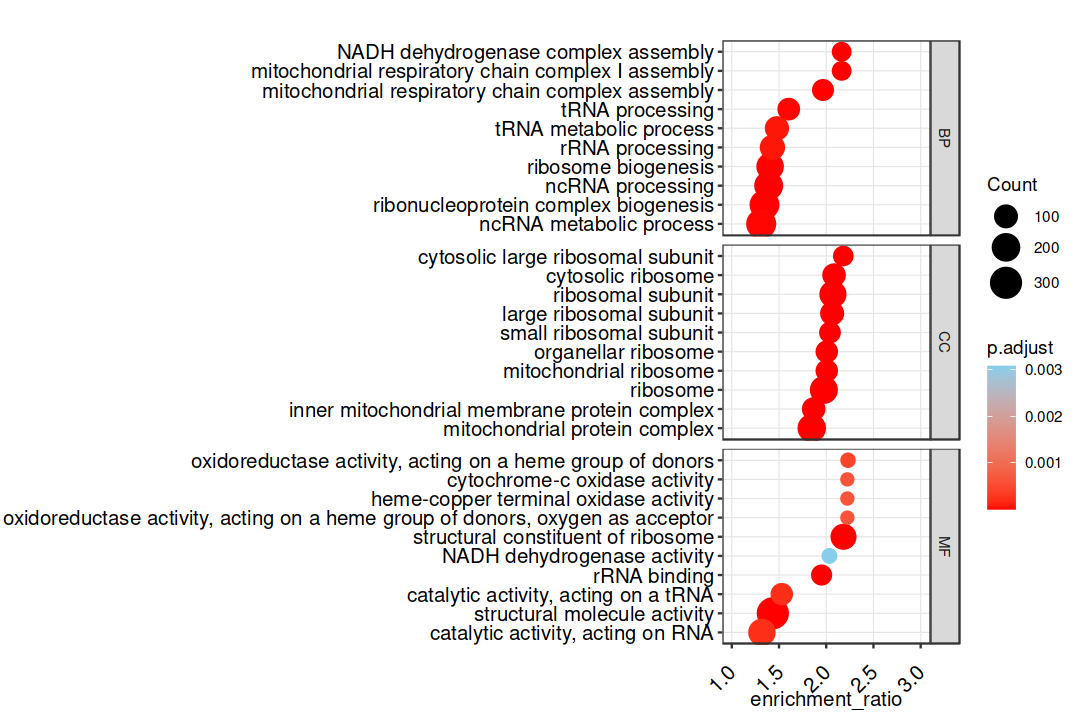

In [66]:
#To change the size of the plots in jupyter notebook
options(repr.plot.width=9, repr.plot.height=6)

dotplot(go, x = "enrichment_ratio",
        split="ONTOLOGY", 
        showCategory = 10,
        orderBy = "enrichment_ratio") + 
facet_grid(ONTOLOGY~., scale="free")+
scale_color_gradient(low = "red", 
                     high = "skyblue")+
ggplot2::coord_cartesian(xlim=c(1, 3))+
ggplot2::scale_x_continuous(breaks=seq(1,3, 0.5))+
theme(axis.ticks = element_line(size=0.5),
      panel.grid.major = element_line(size = 0.25, 
                                      linetype = 'solid',
                                      colour = "grey90"), 
      panel.grid.minor = element_line(size = 0.1, 
                                      linetype = 'solid',
                                      colour = "white"))+
theme(axis.text.x = element_text(angle = 45, 
                                 vjust = 0.5, 
                                 hjust=1))

In [68]:
#write the result to a datframe
Result = go@result
write.csv(Result, "ORA_results_M8.csv")

In [70]:
pdf("GO_ORA_M8.pdf", wi=9, h=6)

par(mfrow = c(1,1))
par(mar = c(4.5,4.5,2.5,1))

dotplot(go, x = "enrichment_ratio",
        split="ONTOLOGY", 
        showCategory = 10,
        orderBy = "enrichment_ratio") + 
facet_grid(ONTOLOGY~., scale="free")+
scale_color_gradient(low = "red", 
                     high = "skyblue")+
ggplot2::coord_cartesian(xlim=c(1, 3))+
ggplot2::scale_x_continuous(breaks=seq(1,3, 0.5))+
theme(axis.ticks = element_line(size=0.5),
      panel.grid.major = element_line(size = 0.25, 
                                      linetype = 'solid',
                                      colour = "grey90"), 
      panel.grid.minor = element_line(size = 0.1, 
                                      linetype = 'solid',
                                      colour = "white"))+
theme(axis.text.x = element_text(angle = 45, 
                                 vjust = 0.5, 
                                 hjust=1))


dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2